# Chapter 02
# Decision Tree Algorithm

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

## 2. Importing Data

In [2]:
df = pd.read_excel('Dataset.xlsx')
df

,ID,Buying,Maintain,Doors,Persons,LuggageBoot,Safety,Class Value
0,1,1,1,2,2,1,1,unacc
1,2,1,1,2,2,1,2,unacc
2,3,1,1,2,2,1,3,unacc
3,4,1,1,2,2,2,1,unacc
4,5,1,1,2,2,2,2,unacc
...,...,...,...,...,...,...,...,...
1589,1590,4,4,5,4,3,1,unacc
1590,1591,4,4,5,5,1,1,unacc
1591,1592,4,4,5,5,1,2,acc
1592,1593,4,4,5,5,2,1,unacc


## 3. Clean the dataset

### 3.1. Dropping 'ID' Column

In [3]:
df = df.drop('ID', axis=1)

### 3.2. Checking for Null values

In [4]:
df.isnull().mean()

Buying         0.0
Maintain       0.0
Doors          0.0
Persons        0.0
LuggageBoot    0.0
Safety         0.0
Class Value    0.0
dtype: float64

### 3.3. Statistics of dataset

In [5]:
df.describe()

,Buying,Maintain,Doors,Persons,LuggageBoot,Safety
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000
mean,2.404642,2.420954,3.486198,3.595985,1.973024,1.940402
std,1.104123,1.112769,1.120543,1.265659,0.817971,0.812388
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000
75%,3.000000,3.000000,4.000000,5.000000,3.000000,3.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000


### 3.4. Boxplot for attributes

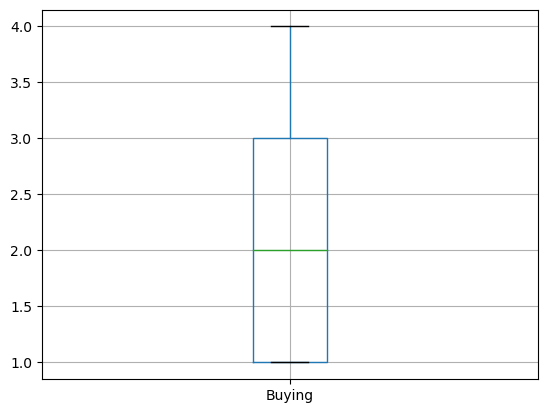

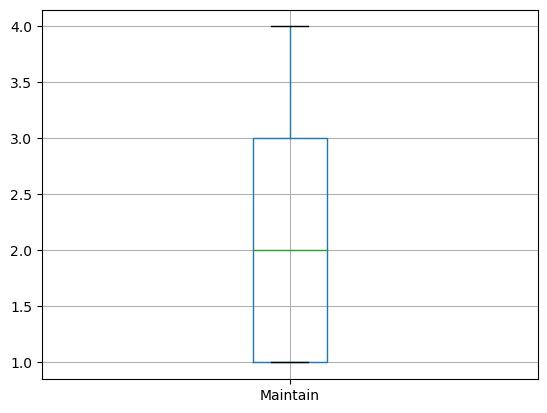

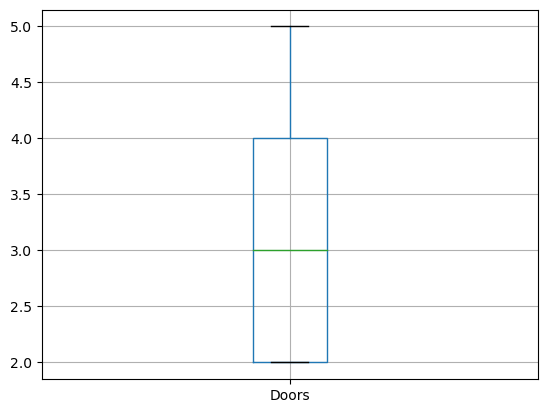

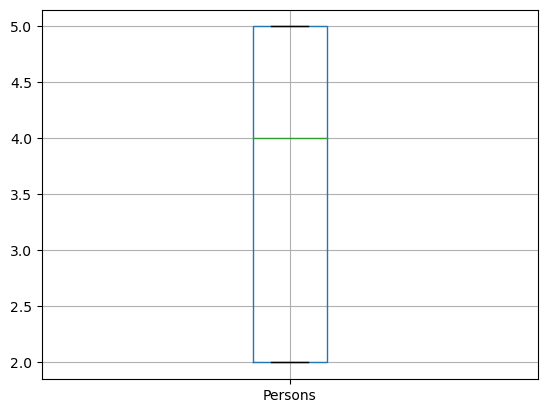

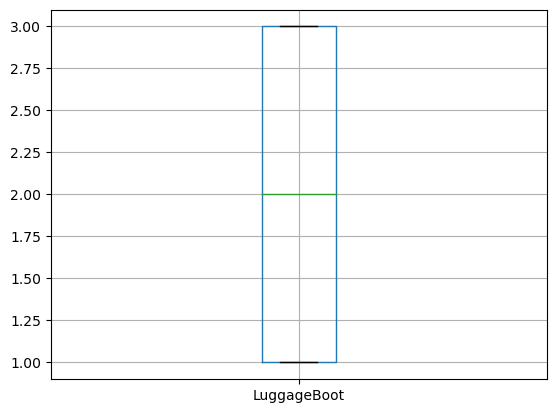

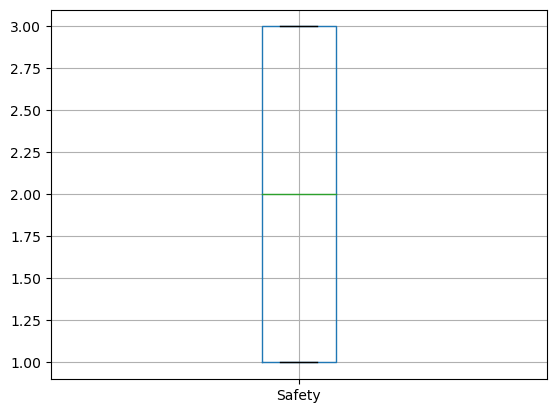

In [6]:
import matplotlib.pyplot as plt

all_columns = ['Buying', 'Maintain', 'Doors', 'Persons', 'LuggageBoot', 'Safety']

for columns in all_columns:
    boxplot = df.boxplot(column=[columns])
    plt.show()

### 3.5. Checking the datatype and converting to type String

In [7]:
df.dtypes

Buying          int64
Maintain        int64
Doors           int64
Persons         int64
LuggageBoot     int64
Safety          int64
Class Value    object
dtype: object

In [8]:
df = df.astype(str)

## 4. Calculating Entropy

In [9]:
def calc_entropy(attribute):  
    
    # get elements and number of unique elements in specified column
    elements, count = np.unique(attribute, return_counts = True)
    
    entropy = 0
    
    # calculating entropy of column
    for i in range(len(elements)):
        entropy = entropy + ((-count[i]/np.sum(count)) * np.log2(count[i]/np.sum(count)))
    
    return entropy

## 5. Calculating Information Gain

In [10]:
def calc_gain(data, attribute, class_attribute):  
         
    print('\nFor ' + attribute + ' column')
    
    # get entropy of total dataset
    total_entropy = calc_entropy(data[class_attribute])
    print('Total Entropy: ' + str(total_entropy))
      
    # get values and number of unique values for split attribute   
    values, count = np.unique(data[attribute], return_counts=True)  
    
    weighted_entropy = 0
    # calculate weighted entropy
    for i in range(len(values)):
        weighted_entropy = weighted_entropy + (count[i]/np.sum(count)) * calc_entropy(data.where(data[attribute] == values[i]).dropna()[class_attribute])
        print('Entropy of ' + values[i] + ': ' + str((count[i]/np.sum(count)) * calc_entropy(data.where(data[attribute] == values[i]).dropna()[class_attribute])))
    
    # calculate information gain  
    information_gain = total_entropy - weighted_entropy
    
    print('Information Gain of ' + attribute + ': ' + str(information_gain))
    
    return information_gain

## 6. Building the Decision Tree

In [11]:
#layer = 0

def build_decision_tree(branch, layer, dataset, original_dataset, attributes, class_attribute, parent_node_class = None):   
    
    # if unique values in class attribute less than 1, returning that class
    if len(np.unique(dataset[class_attribute])) <= 1:
        #print('Class: ' + np.unique(dataset[class_attribute])[0])
        return np.unique(dataset[class_attribute])[0]
    
    # if no data, return class with max count from original dataset
    elif len(np.unique(dataset[class_attribute])) == 0:
        elements, counts = np.unique(original_dataset[class_attribute], return_counts = True)
        max_element = elements[counts == counts.max()]
        return max_element[0]
    
    # if no columns left, return parent node
    elif len(attributes) == 0:
        return parent_node_class
    
    else:
        layer = layer + 1
        print('---------------------------------------------\nLayer ' + str(layer))
        
        if(branch != 0):
            print('For branch ' + branch)
        
        # set parent node to class with max count from dataset
        elements, counts = np.unique(dataset[class_attribute], return_counts = True)
        max_element = elements[counts == counts.max()]
        parent_node_class = max_element[0]

        # calculate gain for each attribute
        gain = []
        for attribute in attributes:
            att_gain = calc_gain(dataset, attribute, class_attribute)
            gain.append(att_gain)

        # find attribute with max gain
        max_gain_index = gain.index(max(gain))
        max_gain_attribute = attributes[max_gain_index]
        print('\nMax Information Gain: ' + max_gain_attribute + '\n')
        
        # start tree with max gain attribute
        tree = {max_gain_attribute:{}}
        
        # remove attribute with max gain from list of attributes
        attributes = [i for i in attributes if i != max_gain_attribute]

        # develop tree again for each unique value in max gain column
        for value in np.unique(dataset[max_gain_attribute]):
            
            # split unique values in max gain column
            sub_data = dataset.where(dataset[max_gain_attribute] == value).dropna()
              
            # call decision tree function for each sub_data
            subtree = build_decision_tree(value, layer, sub_data, df, attributes, class_attribute, parent_node_class)  
              
            # add the sub tree to the developed tree 
            tree[max_gain_attribute][value] = subtree  
              
        return(tree)
        

In [12]:
ans_decision_tree = build_decision_tree(0, 0, df, df, df.columns[:-1], df.columns[-1]) 

pprint(ans_decision_tree)

---------------------------------------------
Layer 1

For Buying column
Total Entropy: 0.7965393567803767
Entropy of 1: 0.1761666788908965
Entropy of 2: 0.21986960462129573
Entropy of 3: 0.2118297139121533
Entropy of 4: 0.17881045520040625
Information Gain of Buying: 0.009862904155624852

For Maintain column
Total Entropy: 0.7965393567803767
Entropy of 1: 0.1761666788908965
Entropy of 2: 0.21350138093670923
Entropy of 3: 0.2118297139121533
Entropy of 4: 0.18518664471691013
Information Gain of Maintain: 0.00985493832370754

For Doors column
Total Entropy: 0.7965393567803767
Entropy of 2: 0.18382870770600793
Entropy of 3: 0.2023248538369325
Entropy of 4: 0.20393491894087493
Entropy of 5: 0.20393491894087493
Information Gain of Doors: 0.002515957355686438

For Persons column
Total Entropy: 0.7965393567803767
Entropy of 2: 0.0
Entropy of 4: 0.30832004374983274
Entropy of 5: 0.30201571346377654
Information Gain of Persons: 0.18620359956676746

For LuggageBoot column
Total Entropy: 0.796539

Entropy of 4: 0.17188764163984815
Entropy of 5: 0.17188764163984815
Information Gain of Doors: 0.02399941144850415

For LuggageBoot column
Total Entropy: 0.863120568566631
Entropy of 1: 0.38095238095238093
Entropy of 2: 0.287706856188877
Entropy of 3: 0.0
Information Gain of LuggageBoot: 0.19446133142537314

Max Information Gain: Maintain

---------------------------------------------
Layer 5
For branch 1

For Doors column
Total Entropy: 1.0
Entropy of 2: 0.2295739585136224
Entropy of 3: 0.2295739585136224
Entropy of 4: 0.2295739585136224
Entropy of 5: 0.2295739585136224
Information Gain of Doors: 0.08170416594551044

For LuggageBoot column
Total Entropy: 1.0
Entropy of 1: 0.0
Entropy of 2: 0.3333333333333333
Entropy of 3: 0.0
Information Gain of LuggageBoot: 0.6666666666666667

Max Information Gain: LuggageBoot

---------------------------------------------
Layer 6
For branch 2

For Doors column
Total Entropy: 1.0
Entropy of 2: 0.0
Entropy of 3: 0.0
Entropy of 4: 0.0
Entropy of 5: 0.0

Entropy of 4: 0.0
Entropy of 5: 0.0
Information Gain of Doors: 0.8112781244591328

Max Information Gain: Doors

---------------------------------------------
Layer 6
For branch 4

For Doors column
Total Entropy: 0.8112781244591328
Entropy of 2: 0.0
Entropy of 3: 0.0
Entropy of 4: 0.0
Entropy of 5: 0.0
Information Gain of Doors: 0.8112781244591328

Max Information Gain: Doors

---------------------------------------------
Layer 5
For branch 3

For Maintain column
Total Entropy: 0.6193821946787638
Entropy of 1: 0.2496240382951178
Entropy of 2: 0.2496240382951178
Entropy of 3: 0.0
Entropy of 4: 0.0
Information Gain of Maintain: 0.12013411808852814

For Doors column
Total Entropy: 0.6193821946787638
Entropy of 2: 0.3076923076923077
Entropy of 3: 0.0
Entropy of 4: 0.0
Entropy of 5: 0.0
Information Gain of Doors: 0.31168988698645606

Max Information Gain: Doors

---------------------------------------------
Layer 6
For branch 2

For Maintain column
Total Entropy: 1.0
Entropy of 1: 0.0
Entrop

Entropy of 3: 0.21494899981236407
Entropy of 4: 0.21494899981236407
Entropy of 5: 0.21494899981236407
Information Gain of Doors: 0.035897104399462476

For LuggageBoot column
Total Entropy: 0.9474351361840307
Entropy of 1: 0.38583391542965756
Entropy of 2: 0.28235100787447287
Entropy of 3: 0.26876951240619207
Information Gain of LuggageBoot: 0.010480700473708304

Max Information Gain: Buying

---------------------------------------------
Layer 5
For branch 2

For Doors column
Total Entropy: 0.41381685030363374
Entropy of 2: 0.2295739585136224
Entropy of 3: 0.0
Entropy of 4: 0.0
Entropy of 5: 0.0
Information Gain of Doors: 0.18424289179001135

For LuggageBoot column
Total Entropy: 0.41381685030363374
Entropy of 1: 0.2704260414863776
Entropy of 2: 0.0
Entropy of 3: 0.0
Information Gain of LuggageBoot: 0.14339080881725613

Max Information Gain: Doors

---------------------------------------------
Layer 6
For branch 2

For LuggageBoot column
Total Entropy: 0.9182958340544896
Entropy of 1: 0

## 7. Plotting Decision Tree

In [13]:
import pydot
import graphviz

### 7.1. Drawing the tree

In [14]:
def draw_tree(parent_name, child_name):
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)

In [15]:
count = 0

def visit(node, parent=None):
    for condition, element in node.items():
        
        # declaring variable to uniquely identify each node
        global count
        count = count + 1
        strCount = '(' + str(count) + ')'
        
        if isinstance(element, dict):
            # start with node where parent = None
            if parent:
                draw_tree(parent, condition + '_' + strCount)
            
            # if element is dict type, revisit tree
            visit(element, condition + '_' + strCount)
        else:
            draw_tree(parent, condition + '_' + strCount)
            
            # drawing the label using a distinct name
            draw_tree(condition + '_' + strCount, element + '_' + strCount)

### 7.2. Saving the Decision Tree

In [16]:
graph = pydot.Dot(graph_type='graph')
visit(ans_decision_tree)

graph.write_png('decision_tree.png')